# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from itertools import chain
from sklearn.feature_selection import mutual_info_classif

# Load the data from the first sheet, drop the 
excel_path = "data/export.xlsx"
data = pd.read_excel(excel_path, sheet_name='Sheet1', index_col=0)

### Data types

In [2]:
# Display basic information and the first few rows of the dataset
data_info = data.info()

print(data_info)
data.sample(5).T

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, 0 to 9974
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airlines                9975 non-null   object 
 1   booking_window_group    9975 non-null   object 
 2   children                9975 non-null   int64  
 3   distance                9906 non-null   float64
 4   est_dst_temperature     9933 non-null   float64
 5   src_dst_gdp             9365 non-null   float64
 6   bag_total_price         9975 non-null   float64
 7   bag_volume              9975 non-null   int64  
 8   bag_weight              9975 non-null   int64  
 9   is_intercontinental     9975 non-null   int64  
 10  nr_of_stopovers         9975 non-null   int64  
 11  travel_time             9975 non-null   float64
 12  within_country          9975 non-null   int64  
 13  price                   9824 non-null   float64
 14  partner                 9975 non-null   objec

,2882,5451,4423,2376,4753
airlines,airline2,airline10,airline3,airline8,airline10
booking_window_group,7 - 13 days,0 - 3 days,0 - 3 days,0 - 3 days,14 - 20 days
children,0,0,0,0,0
distance,716.799058,417.58532,667.736359,1482.550324,1602.938716
est_dst_temperature,23.765597,10.841699,11.62819,14.779652,2.087951
src_dst_gdp,1.0,1.0,1.0,1.0,1.0
bag_total_price,85.713997,93.890999,88.791,87.873001,96.271004
bag_volume,113568,113568,109512,113568,113568
bag_weight,25,18,18,15,18
is_intercontinental,0,0,0,0,0


Data seems to be well formatted and of the expected types:
- Categorical data: `airlines`, `booking_window_group`, `partner`, `market_group`
- Floats: `distance`, `est_dst_temperature`, `src_dst_gdp`, `bag_total_price`, `travel_time`, `price`, `bag_base_price`
- Integers: `children`, `bag_weight`, `nr_of_stopovers`, `passengers`
- Boolean: `is_intercontinental`, `within_country`, `us_movement_outside_us`, `Bag_Purchased`
- Constant: `markup`

In [3]:
categorical = ['airlines', 'booking_window_group', 'partner', 'market_group']
floats = ['distance', 'est_dst_temperature', 'src_dst_gdp', 'bag_total_price', 'travel_time', 'price', 'bag_base_price']
ints = ['children', 'bag_weight', 'nr_of_stopovers', 'passengers']
bools = ['is_intercontinental', 'within_country', 'us_movement_outside_us', 'Bag_Purchased']
const = ['markup']

In [4]:
data[categorical + bools] = data[categorical + bools].astype('category')

Missing values mostly on 
- 'src_dst_gdp' (6%): Probably due to data unavailability of third world countries
- 'price' (1%): Second most frequent miss, no obvious reason
- 'est_dst_temperature' (0.4%) of missing entries, probably due to unavailable data
- 'distance' (0.6%)

### Summary Statistics

In [5]:
# Numerical columns
data[ints + floats].describe()

,children,bag_weight,nr_of_stopovers,passengers,distance,est_dst_temperature,src_dst_gdp,bag_total_price,travel_time,price,bag_base_price
count,9975.000000,9975.000000,9975.000000,9975.00000,9906.000000,9933.000000,9365.000000,9975.000000,9975.000000,9824.000000,9975.000000
mean,0.057043,20.116792,0.000401,1.54005,1536.352650,14.083276,1.138487,64.616167,2.604242,106.072021,38.009509
std,0.312904,3.583054,0.020022,1.01046,1042.876364,9.063411,1.771107,29.105234,1.301669,68.292405,17.120725
min,0.000000,15.000000,0.000000,1.00000,102.131987,-16.818072,0.014361,12.223001,0.583333,6.660000,7.190000
25%,0.000000,18.000000,0.000000,1.00000,726.907555,7.609947,1.000000,34.714001,1.583333,58.370000,20.420000
50%,0.000000,23.000000,0.000000,1.00000,1320.216732,16.005512,1.000000,78.047005,2.333333,87.960000,45.910000
75%,0.000000,23.000000,0.000000,2.00000,2024.621049,20.732469,1.000000,86.921005,3.250000,135.335000,51.130001
max,5.000000,25.000000,1.000000,9.00000,8887.103223,33.225635,69.635286,169.575012,11.083333,810.280000,99.750000


Actually, there are no flights with more than 1 stopover, however, it's worth keeping as an int because there could be more.

In [6]:
# Categrorical columns
categorical_columns = categorical + bools
data[categorical_columns].describe()

,airlines,booking_window_group,partner,market_group,is_intercontinental,within_country,us_movement_outside_us,Bag_Purchased
count,9975,9975,9975,9975,9975,9975,9975,9975
unique,13,8,2,18,2,2,2,2
top,airline10,0 - 3 days,partner1,market1,0,1,1,0
freq,2100,2670,5571,3693,9615,6564,7123,7591


* `airline10` is significantly over-represented.
* Most flights booked in the `0 - 3 days` window.
* `market1` is hugely overrepresented
* The great majority of flights are **not intercontinental**.

In [7]:
# Boolean columns
data[bools].astype(int).mean()

is_intercontinental       0.036090
within_country            0.658045
us_movement_outside_us    0.714085
Bag_Purchased             0.238997
dtype: float64

**There is a 23% of positives in the target variable. This is a mild class imbalance and it may need to be accounted for**

## Visualize statistics

#### Numerical variables

In [8]:
numerical_columns = ints + floats
numerical_columns

['children',
 'bag_weight',
 'nr_of_stopovers',
 'passengers',
 'distance',
 'est_dst_temperature',
 'src_dst_gdp',
 'bag_total_price',
 'travel_time',
 'price',
 'bag_base_price']

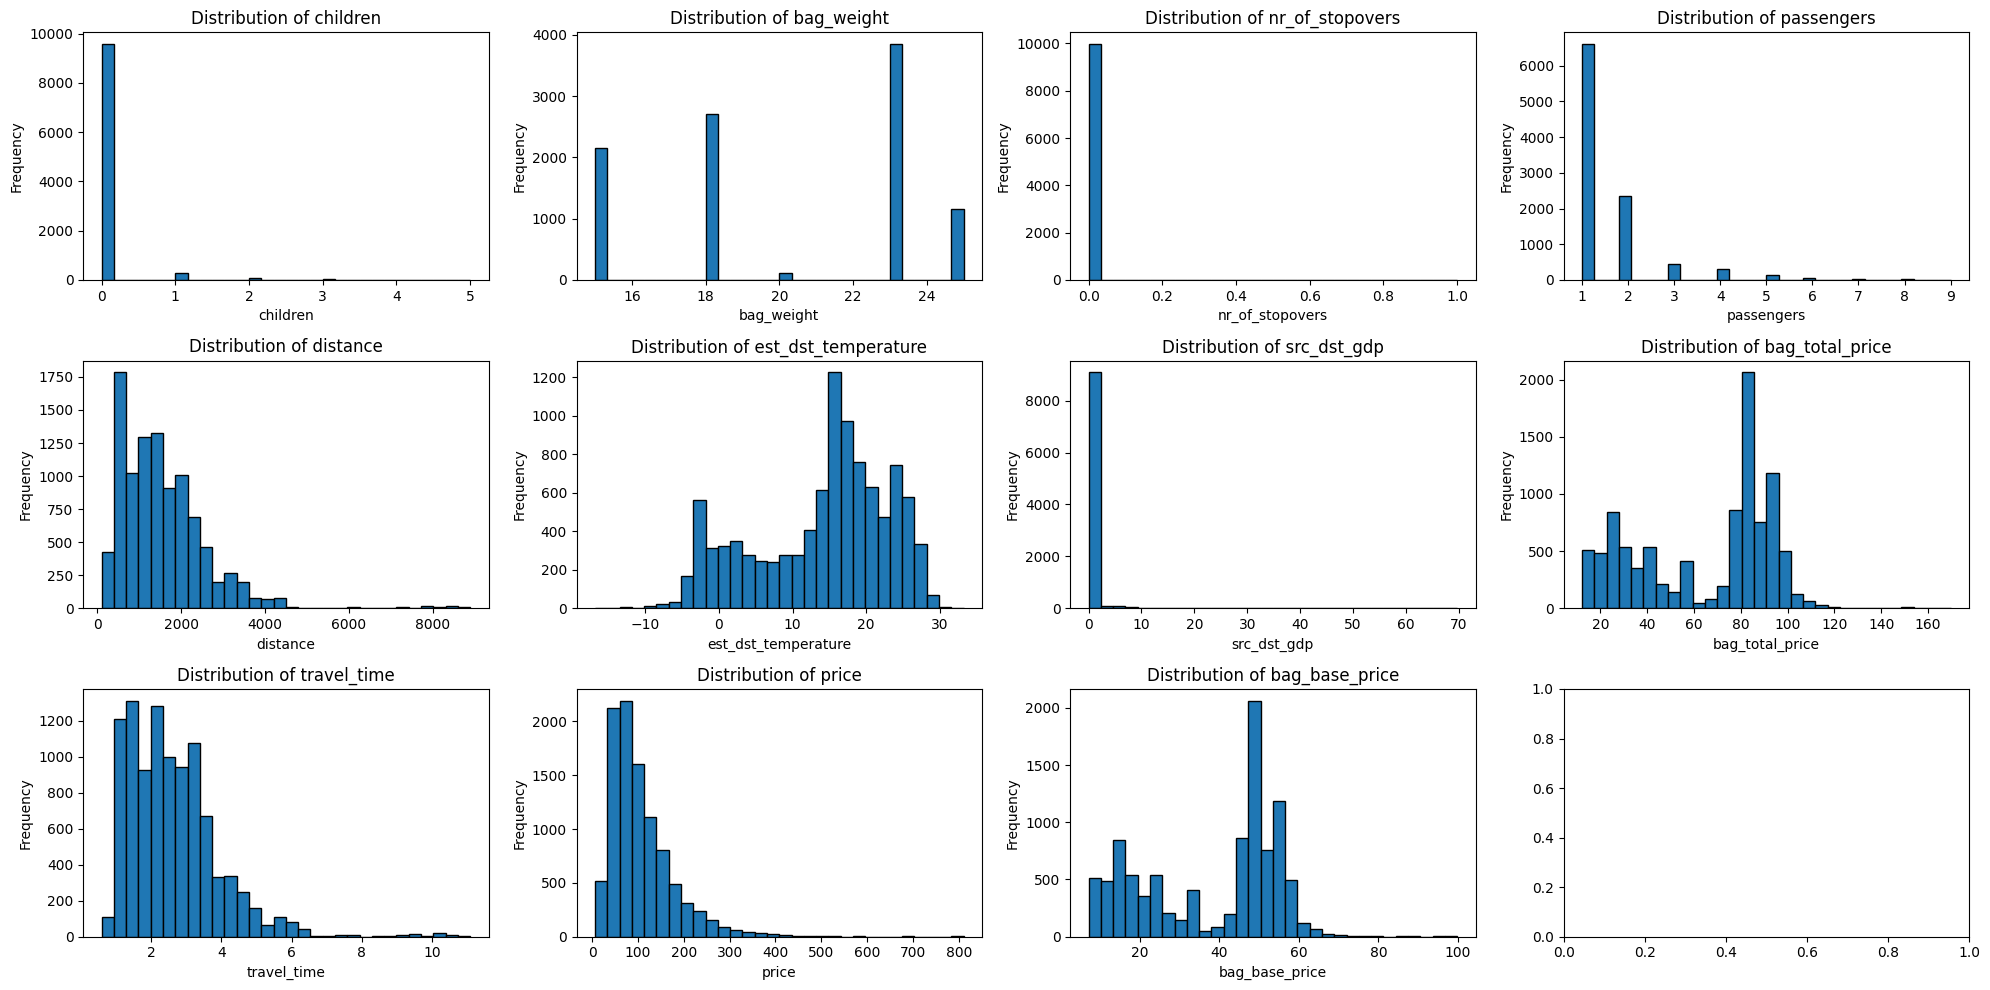

In [9]:
# Plotting the distribution of each numerical column
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for column, ax in zip(numerical_columns, chain(*axes)):
    ax.hist(data[column].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

`src_dst_gdp` is highly concentrated around 1. Let's blow it up to see if there is structure

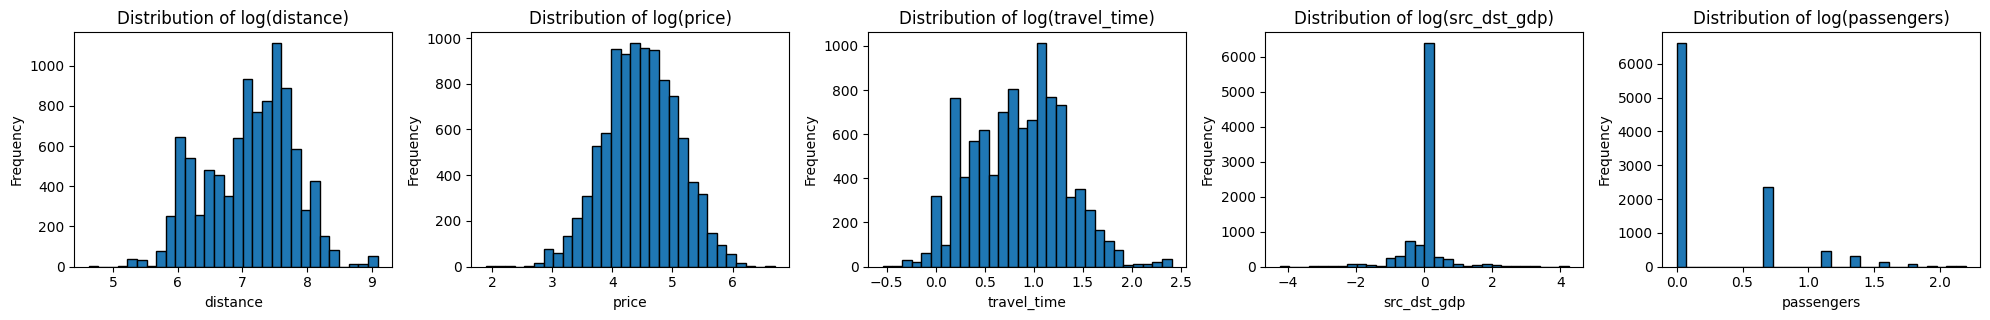

In [10]:
# Look at the log of highly skewed variables
log_columns = ['distance', 'price', 'travel_time', 'src_dst_gdp', 'passengers']

# Plotting the distribution of each numerical column
fig, axes = plt.subplots(1, 5, figsize=(20, 3.3))

for column, ax in zip(log_columns, axes):
    ax.hist(np.log(data[column].replace({0: np.nan}).dropna()), bins=30, edgecolor='k')
    ax.set_title(f'Distribution of log({column})')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Boolean variables

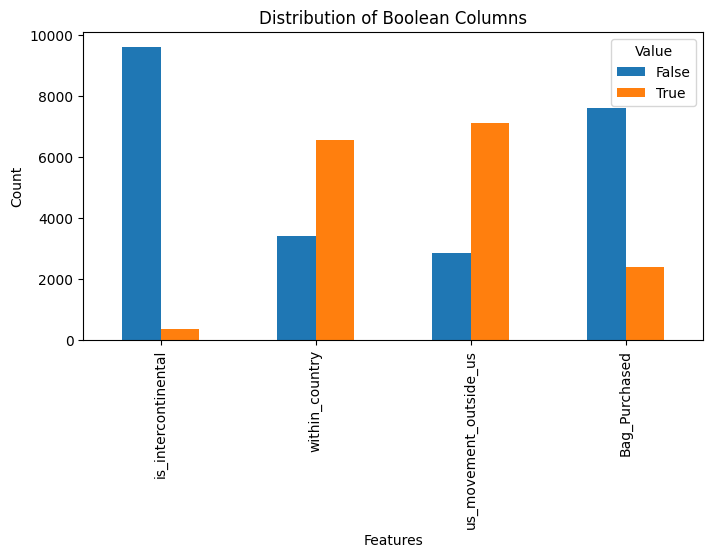

In [11]:
# Count True and False values for each column
counts = data[bools].astype(bool).apply(lambda x: x.value_counts()).T
counts = counts.fillna(0)  # Fill NaN with 0

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Create a bar chart
counts.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_xlabel('Features')
ax.set_ylabel('Count')
ax.set_title('Distribution of Boolean Columns')
ax.legend(title='Value')

plt.show()

#### Categorical Variables

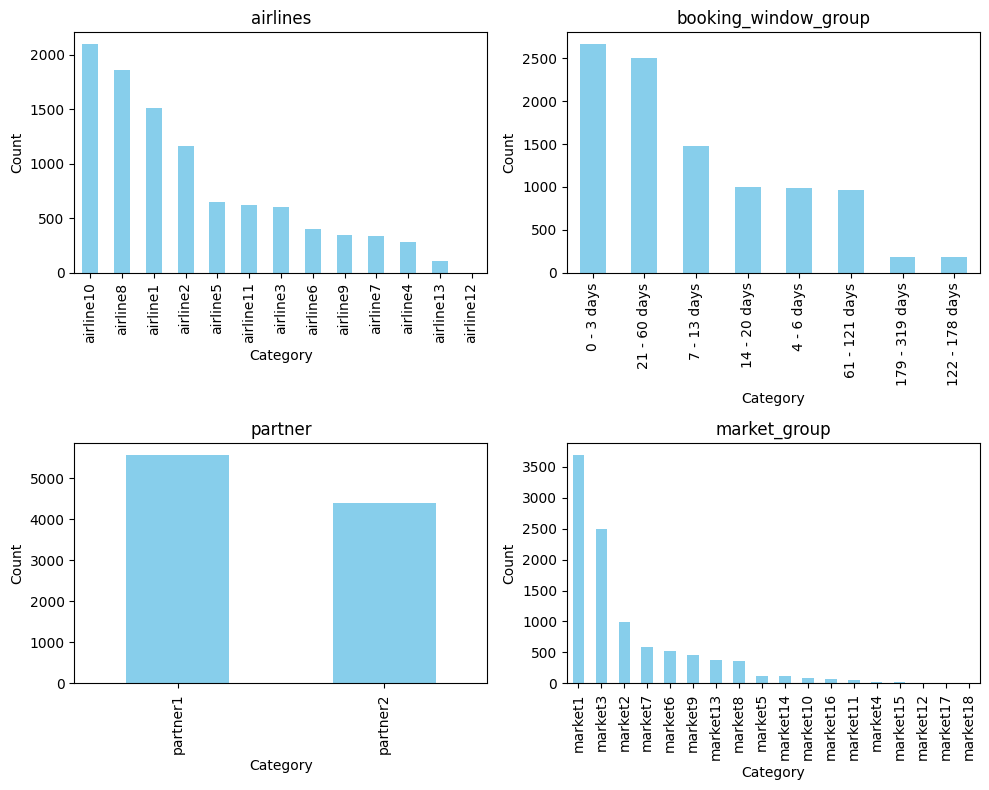

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create a bar chart for each categorical column
for col, ax in zip(categorical, chain(*axes)):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Missing values

In [13]:
data.isna().mean()

airlines                  0.000000
booking_window_group      0.000000
children                  0.000000
distance                  0.006917
est_dst_temperature       0.004211
src_dst_gdp               0.061153
bag_total_price           0.000000
bag_volume                0.000000
bag_weight                0.000000
is_intercontinental       0.000000
nr_of_stopovers           0.000000
travel_time               0.000000
within_country            0.000000
price                     0.015138
partner                   0.000000
passengers                0.000000
us_movement_outside_us    0.000000
market_group              0.000000
markup                    0.000000
bag_base_price            0.000000
Bag_Purchased             0.000000
dtype: float64

Most frequent missing values are for `src_dst_grp` for which most frequent value is 1. We'll use this for imputation.

Next most frequent missing value is `price`, which is strongly correlated with distance and `travel_time`. We'll use `travel_time` and `booking_window_group` to impute it.

#### Statistics of entries with missing `price`

In [14]:
data[data['price'].isna()][categorical+bools].describe()

,airlines,booking_window_group,partner,market_group,is_intercontinental,within_country,us_movement_outside_us,Bag_Purchased
count,151,151,151,151,151,151,151,151
unique,12,8,2,13,2,2,2,2
top,airline8,21 - 60 days,partner1,market1,0,1,1,0
freq,37,45,76,57,144,102,104,111


In [15]:
data[data['price'].isna()][numerical_columns].describe()

,children,bag_weight,nr_of_stopovers,passengers,distance,est_dst_temperature,src_dst_gdp,bag_total_price,travel_time,price,bag_base_price
count,151.000000,151.000000,151.0,151.000000,150.000000,148.000000,140.000000,151.000000,151.000000,0.0,151.000000
mean,0.092715,19.496689,0.0,1.814570,1551.384395,13.210625,1.351769,67.103055,2.672075,NaN,39.472384
std,0.389033,3.581199,0.0,1.157031,948.176726,9.031066,2.268839,27.775696,1.226065,NaN,16.338645
min,0.000000,15.000000,0.0,1.000000,318.214769,-7.382005,0.108724,12.325001,1.000000,NaN,7.250000
25%,0.000000,15.000000,0.0,1.000000,816.015598,7.075624,1.000000,39.202002,1.666667,NaN,23.060000
50%,0.000000,18.000000,0.0,1.000000,1529.106647,15.299916,1.000000,80.766998,2.750000,NaN,47.509998
75%,0.000000,23.000000,0.0,2.000000,2063.776539,19.504059,1.000000,89.573002,3.250000,NaN,52.689999
max,2.000000,25.000000,0.0,6.000000,7738.541775,28.154031,18.521766,108.120003,9.750000,NaN,63.599998


## Correlation analysis

We look at the correlations among different types of variables

### Correlation amongst numerical variables

The Pearson correlation coefficients

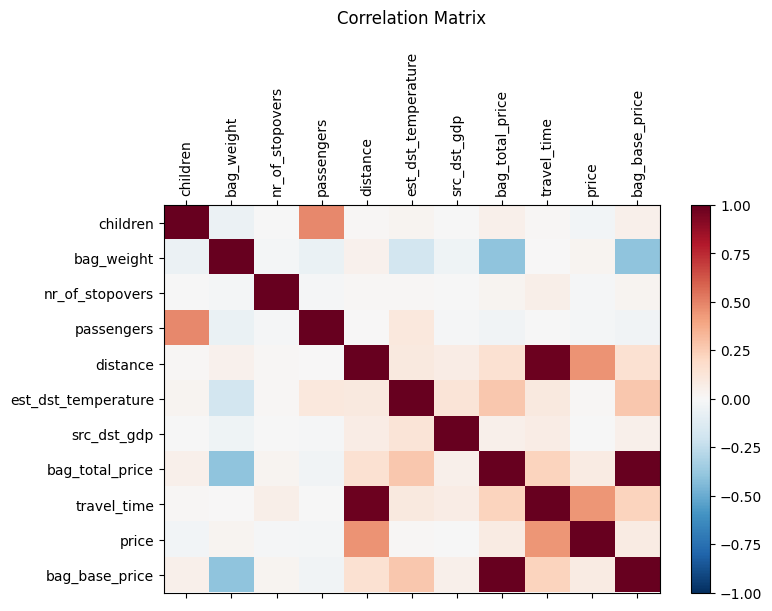

In [16]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr(numeric_only=True)

# Plot the correlation matrix
norm = CenteredNorm()
plt.figure(figsize=(8, 5))
plt.matshow(correlation_matrix, fignum=1, cmap='RdBu_r', aspect='auto', norm=norm)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

Obvious correlations between 
- `distance` and `travel_time` and `price`, 
- `bag_total_price` and `bag_base_price` because the dataset contains constant 70% markup prices
- `passengers` and `children`.

Interestingly, negative correlation between `bag_weight` and `bag_total_price` & `bag_base_price`.

There are some mild correlations between `distance` and `bag_base_price`. It may be through `airline` because different airlines travel to different destinations and have different bag policies.

#### Largest to smallest correlations

In [17]:
# Sort pairs in terms of their degree of correlation
sorted_correlations = correlation_matrix.where(
    # Since the corr. matrix is symmetric, use a triangular mask to avoid duplication
    ~np.triu(np.ones(correlation_matrix.shape)).astype(bool)
).stack().dropna().sort_values()

In [18]:
# Largest correlation

sorted_correlations.tail(10)

bag_base_price   distance               0.154657
travel_time      bag_total_price        0.219677
bag_base_price   travel_time            0.219677
bag_total_price  est_dst_temperature    0.268451
bag_base_price   est_dst_temperature    0.268451
price            travel_time            0.440927
                 distance               0.450951
passengers       children               0.482539
travel_time      distance               0.980361
bag_base_price   bag_total_price        1.000000
dtype: float64

In [19]:
# Largest negative correlation

sorted_correlations.head(10)

bag_total_price      bag_weight   -0.398824
bag_base_price       bag_weight   -0.398824
est_dst_temperature  bag_weight   -0.182007
passengers           bag_weight   -0.068017
bag_weight           children     -0.057900
src_dst_gdp          bag_weight   -0.040089
bag_total_price      passengers   -0.035985
bag_base_price       passengers   -0.035985
price                children     -0.031026
                     passengers   -0.018743
dtype: float64

### Correlation amongst categorical variables

Use the mutual information to determine how much each variable tells us about another. Diagonal figures are the Shannon entropy of each variable.

In [20]:
cat_bool_data = pd.DataFrame()

# Convert categorical variables to numerical codes
for col in categorical_columns:
    cat_bool_data[col] = data[col].astype('category').cat.codes

In [21]:
mi_df = pd.DataFrame(
    {
        col: mutual_info_classif(cat_bool_data, cat_bool_data[col]) for col in cat_bool_data.columns
    },
    index=cat_bool_data.columns, columns=cat_bool_data.columns
)

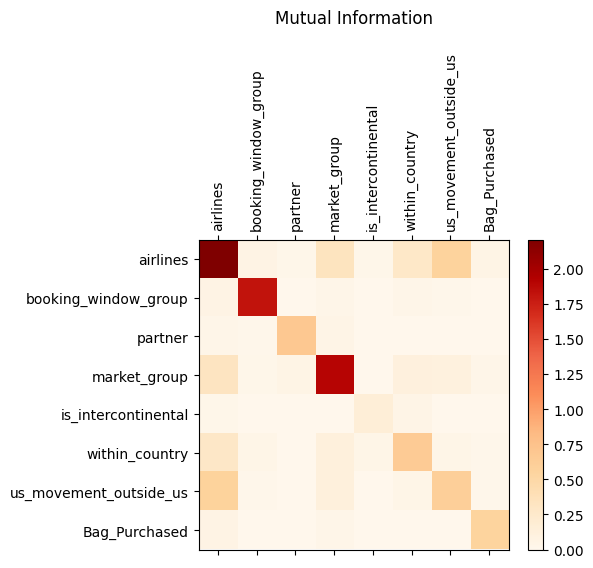

In [22]:
plt.figure(figsize=(5, 4))
plt.matshow(mi_df, fignum=1, cmap='OrRd', aspect='auto')
plt.xticks(range(len(mi_df.columns)), mi_df.columns, rotation=90)
plt.yticks(range(len(mi_df.columns)), mi_df.columns)
plt.colorbar()
plt.title('Mutual Information', pad=20)
plt.show()

In [23]:
# Pairs of variables with largest mutual info

mi_df.where(
    # Since the corr. matrix is symmetric, use a triangular mask to avoid duplication
    ~np.triu(np.ones(mi_df.shape)).astype(bool)
).stack().dropna().sort_values().tail(10)

within_country          booking_window_group    0.038982
                        is_intercontinental     0.041892
market_group            partner                 0.059682
Bag_Purchased           airlines                0.062899
booking_window_group    airlines                0.066396
us_movement_outside_us  market_group            0.121358
within_country          market_group            0.125492
                        airlines                0.280729
market_group            airlines                0.323739
us_movement_outside_us  airlines                0.565940
dtype: float64

`airlines` is the variable most correlated with others: `us_movement_outside_us`, `market_group`, `within_county`, probably due to different travel offerings of each distinct airline. Also, it is the most diverse categorical variable, which explains how it can convery information about several other variables.

### Correlation between numerical and categorical data

We use ANOVA $f$-statistic with significance value $p<0.05$ to detect correlations between categorical variables and numerical ones.

In [24]:
from scipy.stats import f_oneway

# Dictionary to hold ANOVA results
anova_results = {}

# Perform ANOVA for each categorical variable against each numerical variable
for cat_col in categorical_columns:
    anova_results[cat_col] = {}
    for num_col in numerical_columns:
        # Group numerical data by each level of the categorical variable
        groups = [data[num_col][data[cat_col] == level].dropna() for level in data[cat_col].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results[cat_col][num_col] = (f_stat, p_value)


# Create a DataFrame for the results
anova_df = pd.DataFrame(anova_results).T
anova_df.index.name = 'categorical'
anova_df.columns.name = 'numerical'

anova_fstat = anova_df.map(lambda x: x[0])
anova_pval = anova_df.map(lambda x: x[1])

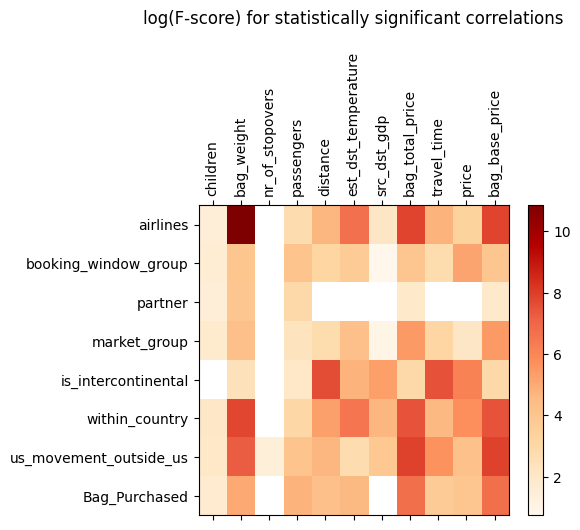

In [25]:
# Where do we find statistically significant correlations?

fstat = np.log(anova_fstat.where(anova_pval.lt(0.05)))

plt.figure(figsize=(5, 4))
plt.matshow(fstat, fignum=1, cmap='OrRd', aspect='auto')
plt.xticks(range(len(fstat.columns)), fstat.columns, rotation=90)
plt.yticks(range(len(fstat.index)), fstat.index)
plt.colorbar()
plt.title('log(F-score) for statistically significant correlations', pad=20)
plt.show()

Big correlation between `bag_weight` and `airline` as each airline probably has their own policy. Significant correlation between `airline` and `bag_bag_price`, `bag_total_price` (as we're working with a constant markup), and `est_dst_temperature` as different airlines travel to different destinations.